In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [26]:
df =  pd.read_parquet('logs.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74307 entries, 0 to 74306
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        74307 non-null  datetime64[ns]
 1   Usuario      74307 non-null  object        
 2   ID           74307 non-null  int64         
 3   Acceso       74307 non-null  object        
 4   Descripción  74307 non-null  object        
 5   IP           74307 non-null  object        
 6   Evento       74307 non-null  object        
 7   nsesiones    15323 non-null  Int64         
 8   pieza        32807 non-null  object        
 9   piezaid      32807 non-null  Int64         
 10  catalogo     32807 non-null  object        
 11  diseñoid     42825 non-null  Int64         
 12  userid       10979 non-null  Int64         
 13  minutos      4893 non-null   float64       
 14  fabricante   86 non-null     object        
 15  logo         7 non-null      object        
 16  emai

In [27]:
usuarios = df.groupby('Usuario')
userdf = pd.DataFrame()
usuarios.size()

Usuario
#0 - null                         10721
#1002 - MOBIHOGAR                   128
#1005 - JESUS BERLANGA HERMOSO       95
#1009 - ANTONIO BREY SILVA           46
#1010 - Muebles Ibárrez              31
                                  ...  
#9313 - MAGRANS LOPEZ OSCAR          19
#936 - MUEBLES MESA                   9
#9441 - PEDIDOS MUEBLES CARLOS       76
#97 - COMODAS Y CAMAS                57
#980 - RENDON E HIJOS S.L.            4
Length: 769, dtype: int64

In [28]:
userdf['TotalEventos'] = usuarios.size()

" event_counts_per_user = df.groupby('Usuario')['Evento'].value_counts().unstack(fill_value=0)\n\nevent_perc_per_user = event_counts_per_user.apply(\n        lambda x: x / x.sum() * 100 if x.sum() > 0 else 0, axis=1\n        )\nevent_perc_per_user = event_perc_per_user.add_prefix('Perc_')\nevent_perc_per_user\n\nuserdf = userdf.join(event_perc_per_user)\n "

In [29]:
userdf['DuracionMedia'] = usuarios['minutos'].mean()
userdf['DiseñosUnicos'] = usuarios.apply(
        lambda x: x.loc[x['diseñoid'].notna() & (x['diseñoid'] > 0), 'diseñoid'].nunique(),
        include_groups=False
    )
userdf['PiezasUnicas'] = usuarios.apply(
        lambda x: x.loc[x['Evento'] == 'AÑADIR_PIEZA', 'pieza'].nunique(),
        include_groups=False
    )
userdf['CatalogosUnicos'] = usuarios.apply(
        lambda x: x.loc[x['Evento'] == 'AÑADIR_PIEZA', 'catalogo'].nunique(),
        include_groups=False
    )

userdf.fillna(0, inplace=True) 
userdf

,TotalEventos,DuracionMedia,DiseñosUnicos,PiezasUnicas,CatalogosUnicos
Usuario,,,,,
#0 - null,10721,0.000000,5,0,0
#1002 - MOBIHOGAR,128,321.308117,7,70,6
#1005 - JESUS BERLANGA HERMOSO,95,92.481906,5,32,2
#1009 - ANTONIO BREY SILVA,46,69.030038,1,10,2
#1010 - Muebles Ibárrez,31,112.024528,2,9,2
...,...,...,...,...,...
#9313 - MAGRANS LOPEZ OSCAR,19,67.648683,0,11,2
#936 - MUEBLES MESA,9,65.310400,1,0,0
#9441 - PEDIDOS MUEBLES CARLOS,76,67.232101,14,20,4


In [30]:
scaler = StandardScaler()
userdf[['TotalEventos_T', 'DuracionMedia_T','DiseñosUnicos_T', 'PiezasUnicas_T','CatalogosUnicos_T']] = scaler.fit_transform(userdf)


In [31]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize = (10, 5))
    plt.plot(means, inertias, 'o-')
    plt.show()

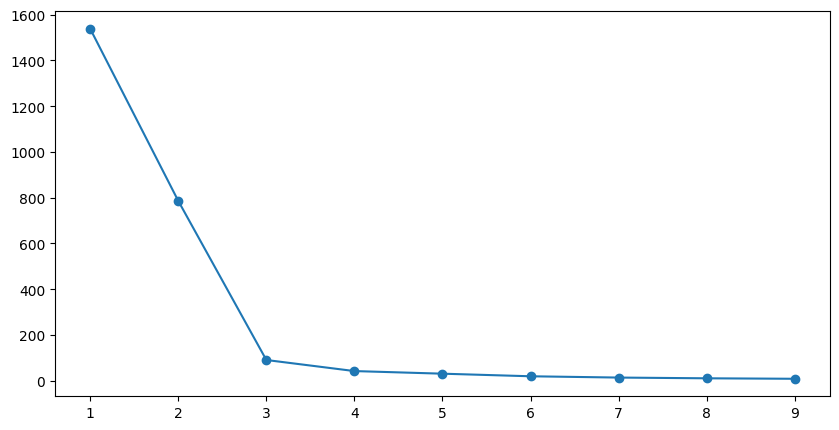

In [35]:
optimise_k_means(userdf[['DuracionMedia_T', 'TotalEventos_T']], 10)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(userdf[['DuracionMedia_T','TotalEventos_T']])
userdf['kmeans_3'] = kmeans.labels_
userdf.sort_values('DuracionMedia', ascending=False).head(30)

,TotalEventos,DuracionMedia,DiseñosUnicos,PiezasUnicas,CatalogosUnicos,TotalEventos_T,DuracionMedia_T,DiseñosUnicos_T,PiezasUnicas_T,CatalogosUnicos_T,kmeans_3
Usuario,,,,,,,,,,,
#20650 - CONFORAMA 921 CONFOKID,3,18870.260000,0,0,0,-0.232189,27.402776,-0.639578,-0.684911,-0.926624,1
#16883 - INTERNI Z4,95,1515.571634,2,39,3,-0.004038,2.034874,-0.286248,0.321072,0.066741,0
#3957 - OPTIMACONFORT,265,1312.024084,6,75,2,0.417547,1.737343,0.420412,1.249672,-0.264381,3
#3173 - ALMMA,171,967.109524,6,57,6,0.184435,1.233170,0.420412,0.785372,1.060106,3
#14094 - BRANCOLAR,110,772.878556,4,41,2,0.033161,0.949256,0.067082,0.372661,-0.264381,0
#2706 - Muebles Ros,14,767.119892,1,2,1,-0.204910,0.940839,-0.462913,-0.633323,-0.595503,0
#16086 - SANCHEZ NOVO S.L.,49,744.890250,5,24,4,-0.118113,0.908345,0.243747,-0.065845,0.397863,0
#20069 - MUEBLES EL VALLE LAURA,244,707.468499,6,86,5,0.365469,0.853644,0.420412,1.533411,0.728985,3
#14137 - MEUBLES FEUERER,39,574.108500,1,15,1,-0.142912,0.658708,-0.462913,-0.297995,-0.595503,0


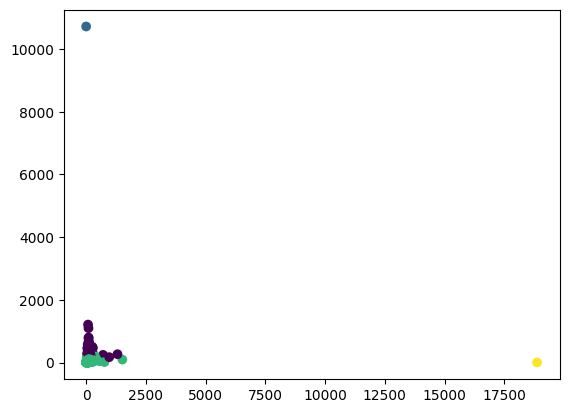

In [39]:
plt.scatter(x=userdf.DuracionMedia, y=userdf.TotalEventos, c=userdf.kmeans_3)
plt.show()